In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

<img src="https://leafalice-image.oss-cn-hangzhou.aliyuncs.com/img/2024-03-27%2F2614032cb89b5d618cd3529013b62d69--1aa3--image-20240327124552610.png" alt="image-20240327124552610" style="zoom: 67%;" />

$$
f(x + \Delta x) = f(x) + f'(x) \Delta x \\
\Delta x = - \alpha f'(x) \\
f'(x) \Delta x = - \alpha (f'(x))^2 

最大值 x = -1.4999999608481722 最大值 y = 3.2499999999999982 迭代次数 n = 128


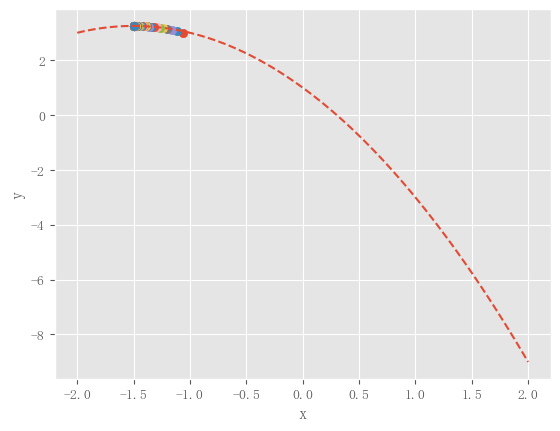

In [10]:
x = -1
alpha = 0.06
count = 0

while True:
    count += 1
    y_last =  - x**2 - 3 * x + 1
    x = x + alpha * (-2 * x - 3)
    y_next = - x**2 - 3 * x + 1
    plt.scatter(x, y_last)
    if abs(y_next - y_last) < 1e-300:
        break
print("最大值 x =", x, "最大值 y =", y_next, "迭代次数 n =", count)
x = np.linspace(-2, 2, 100)
y = -x**2 - 3 * x + 1
plt.plot(x, y, "--")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<img src="https://leafalice-image.oss-cn-hangzhou.aliyuncs.com/img/2024-03-27%2F4409a7440f4b4728c6c2dc2355b77af6--9619--image-20240327130627038.png" alt="image-20240327130627038" style="zoom: 67%;" />

In [7]:
def f(x):
    y = x**3 - x - 1  # 求根方程的表达式
    return y


def g(x):
    y = 3 * x**2 - 1
    return y


if __name__ == "__main__":
    x0 = 1.5  # 取初值
    e = 10 ** (-9)  # 误差要求
    L = 0  # 迭代次数
    while abs((f(x0) - 0)) > e:
        # x(n + 1) = x(n) - f(x(n)) / f'(x(n))
        x1 = x0 - f(x0) / g(x0)  # 迭代公式
        x0 = x1
        L += 1  # 统计迭代次数
    print(f"x1 = {x1}")  # 输出数值解
    print(f(x0) - 0) # 验证解的正确性
    print(f"L = {L}")
    

x1 = 1.3247179572447898
1.865174681370263e-13
L = 4


$$
\begin{cases}
y' = y - \dfrac{2 x}{y} \\
y(0) = 1
\end{cases} \\
h = 0.05

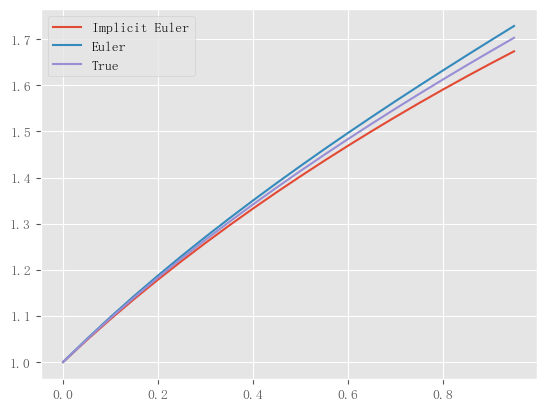

In [13]:
# Initialize arrays
x_values = np.zeros(20)
y_values = np.zeros(20)
y_Euler_values = np.zeros(20)
z_values = np.zeros(20)

# Initial conditions
x_values[0] = 0
y_values[0] = 1
y_Euler_values[0] = 1
z_values[0] = 1 + 2 * x_values[0]
h = 0.05


# Function definitions
def f(x, y):
    return y - 2 * x / y


def F(x, y, yn):
    return h * (y - 2 * x / y) - y + yn


def ff(x, y):
    return 0.1 * x / y**2 - 0.95


def newtonMethod(assumption, d1, d3):
    y = assumption
    next_val = 0
    A = F(d1, y, d3)
    B = ff(d1, y)

    if F(d1, y, d3) == 0.0:
        return y
    else:
        next_val = y - A / B

    if abs(A - F(d1, next_val, d3)) < 1e-5:
        return next_val
    else:
        return newtonMethod(next_val, d1, d3)


# Main loop for calculations
for i in range(1, 20):
    x_values[i] = x_values[i - 1] + h
    y_values[i] = newtonMethod(3, x_values[i], y_values[i - 1])
    y_Euler_values[i] = y_Euler_values[i - 1] + h * f(
        x_values[i - 1], y_Euler_values[i - 1]
    )
    z_values[i] = (1 + 2 * x_values[i]) ** 0.5

# Plotting the results
plt.plot(x_values, y_values, label="Implicit Euler")
plt.plot(x_values, y_Euler_values, label="Euler")
plt.plot(x_values, z_values, label="True")
plt.legend()
plt.show()

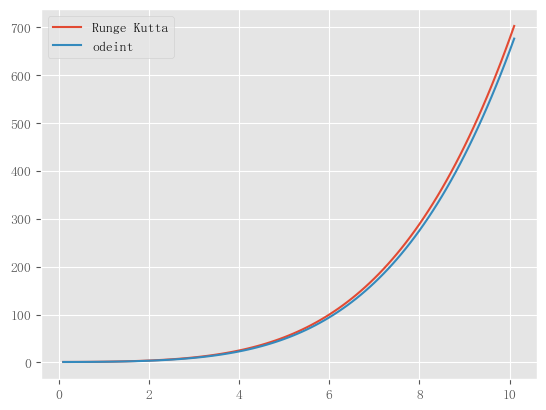

In [17]:
def runge_kutta(y, x, dx, f):
    k1 = dx * f(y, x)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6


if __name__ == "__main__":
    t = 0.0
    y = 1.0
    dt = 0.1
    ys, ts = [], []


def func(y, t):
    return t * np.sqrt(y)


while t <= 10:
    y = runge_kutta(y, t, dt, func)
    t += dt
    ys.append(y)
    ts.append(t)

YS = odeint(func, y0=1, t=np.arange(0, 10.1, 0.1))
plt.plot(ts, ys, label="Runge Kutta")
plt.plot(ts, YS, label="odeint")
plt.legend()
plt.show()

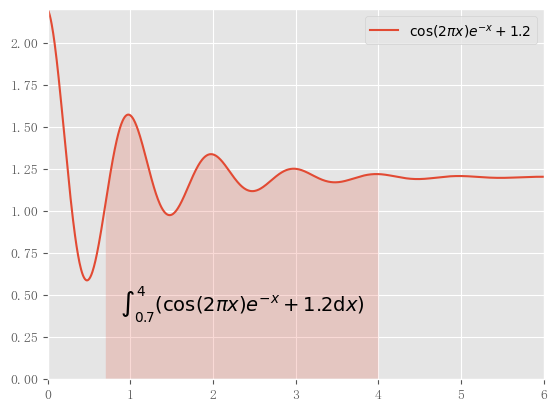

In [4]:
x = np.linspace(0, 6, 1000)
y = np.cos(2 * np.pi * x) * np.exp(-x) + 1.2

plt.axis([np.min(x), np.max(x), 0, np.max(y)])
plt.plot(x, y, label=r"$\cos(2 \pi x)e^{-x}+1.2$")
plt.fill_between(x, y1=y, y2=0, where=(x >= 0.7) & (x <= 4), alpha=0.2)
plt.text(
    0.5 * (0.7 + 4),
    0.4,
    r"$\int_{0.7}^4(\cos(2 \pi x)e^{-x}+1.2 \mathrm{d}x)$",
    horizontalalignment="center",
    fontsize=14,
)
plt.legend()
plt.show()

# 数值积分法

In [5]:
"""
1. 将积分区间划分为 1000 段；
2. 对于每个积分区间，求解左端点和右端点的函数值；
3. 求直角梯形面积；
4. 求和。
"""

h = x[1] - x[0]
xn = 0.7
s = 0
for i in range(1000):
    xn1 = xn + h
    yn = np.cos(2 * np.pi * xn) * np.exp(-xn) + 1.2
    yn1 = np.cos(2 * np.pi * xn1) * np.exp(-xn1) + 1.2
    s0 = (yn + yn1) * h / 2
    s += s0
    xn = xn1

s

7.2765412664746245